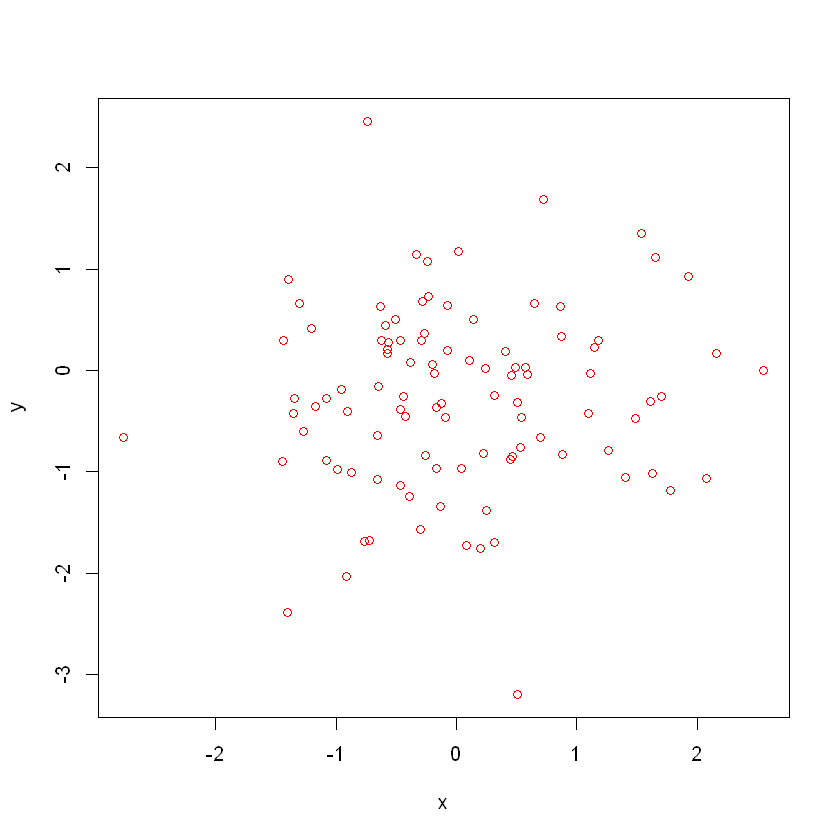

In [1]:
x <- rnorm(100)
y <- rnorm(100)
plot(x,y,col='red')

In [ ]:
install.packages("lattice")
install.packages("Cubist")
install.packages("partykit")
# options(repos = c(CRAN = "https://cran.r-project.org/"))
install.packages("C50")
# install.packages()
# library(C50)
install.packages("ggplot2")
library(ggplot2)

Warning message:
"package 'lattice' is not available (for R version 3.6.1)"Warning message:
"dependency 'lattice' is not available"


  There is a binary version available but the source version is later:
       binary  source needs_compilation
Cubist 0.2.40 0.4.2.1              TRUE

  Binaries will be installed
package 'Cubist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsl\AppData\Local\Temp\RtmpENlFvp\downloaded_packages

  There is a binary version available but the source version is later:
         binary source needs_compilation
partykit 1.2-13 1.2-20              TRUE

  Binaries will be installed
package 'partykit' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsl\AppData\Local\Temp\RtmpENlFvp\downloaded_packages


Warning message:
"dependency 'lattice' is not available"also installing the dependency 'Cubist'




  There are binary versions available but the source versions are later:
        binary  source needs_compilation
Cubist  0.2.40 0.4.2.1              TRUE
C50    0.1.3.1   0.1.8              TRUE

  Binaries will be installed
package 'Cubist' successfully unpacked and MD5 sums checked
package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsl\AppData\Local\Temp\RtmpENlFvp\downloaded_packages


Warning message:
"dependency 'MASS' is not available"also installing the dependencies 'cli', 'gtable', 'lifecycle', 'rlang', 'scales', 'vctrs'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
cli        2.5.0  3.6.1              TRUE
gtable     0.3.0  0.3.4             FALSE
lifecycle  1.0.0  1.0.3             FALSE
rlang     0.4.11  1.1.1              TRUE
scales     1.1.1  1.2.1             FALSE
vctrs      0.3.8  0.6.4              TRUE
ggplot2    3.3.3  3.4.4             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'vctrs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\idsl\AppData\Local\Temp\RtmpENlFvp\downloaded_packages


installing the source packages 'gtable', 'lifecycle', 'scales', 'ggplot2'



In [3]:
path <- "adult.data"
df <- read.csv(path, header=FALSE)
col_names <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income")
colnames(df) <- col_names
df

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
library(C50)
model <- C5.0(df[,-14],df[,14])
model

Warning message:
"package 'C50' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'C50' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'lattice'


In [ ]:
mod1 <- C5.0(Species ~ ., data = iris)
plot(mod1)
plot(mod1, subtree = 3

In [18]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "3"

$minor
[1] "6.1"

$year
[1] "2019"

$month
[1] "07"

$day
[1] "05"

$`svn rev`
[1] "76782"

$language
[1] "R"

$version.string
[1] "R version 3.6.1 (2019-07-05)"

$nickname
[1] "Action of the Toes"

In [1]:
#Set Working Directory to where the datasets have been saved.
library(car)#recoding factor variables
library(reshape)
library(mice)#mice imputation
library(caret)#confusion matrix
library(plotly)#plotting imputed values
library(missForest)#missForest imputation
library(randomForest)#randomForest model
library(Amelia)#amelia imputation
library(VIM)#kNN
library(class)#knn
library(e1071)#Naive Bayes
library(party)#Decision Tree
library(corrplot)#Corelation plot
library(shiny)#For GUI
library(C50)#C5.0 model

#Reading csv files
adult.train <- read.csv("adult.data", header=FALSE, na.strings="?", stringsAsFactors=FALSE)#Load Training Dataset 
adult.train$V14<-as.character(adult.train$V14)
adult.test <- read.csv("adult.test", header=FALSE,stringsAsFactors = F)#Load Testing Dataset
columns<-c('age','workclass','fnlwgt','education','EducationNo','MaritalStatus','occupation','relationship','race','sex','CapitalGain','CapitalLoss','HoursPerWeek','NativeCountry','salary')
colnames(adult.test)<-columns
adult.test<-adult.test[2:16282,]
is.na(adult.test)<-adult.test==' ?'#Replacing the question marks in the testing dataset with NA values
is.na(adult.train)<-adult.train==' ?'#Replacing the question marks in the training dataset with NA values
colnames(adult.train)<-columns
colnames(adult.train)[apply(is.na(adult.train),2,any)]#To find out column names with missing values

#Data cleaning
#Train Dataset
#Deleting education no and fnlwgt
adult.train<-subset(adult.train,select =-c(fnlwgt,EducationNo))#Removing 'fnlwgt' and 'EducationNo' variables
train<-adult.train

#To find out corrplot  after converting it into factor variables
#First convert variables in the train dataset into factor datatype
conversion<-c(2:8,12,13)
train[,conversion]<-lapply(train[,conversion],factor)
train2<-train
#Convert factor variables into numeric datatype to examine corrplot
train2[,conversion]<-lapply(train2[,conversion],as.numeric)
train_corrplot<-corrplot(cor(train2,use ="complete.obs" ),method="number",bg="black")


#Recoding factor levels in categorical variables
#workclass
train$workclass<-recode(train$workclass,'c(" Never-worked"," Without-pay")="Unemployed"')

#education
train$education<-recode(train$education,'c(" Preschool"," 1st-4th"," 7th-8th", " 9th", " 10th"," 5th-6th"," 11th"," 12th")="SchoolLevel"')
train$education<-recode(train$education,'c(" Doctorate"," Masters")="HigherEdu"')

#Marital Status
train$MaritalStatus<-recode(train$MaritalStatus,'c(" Married-AF-spouse"," Married-civ-spouse"," Married-spouse-absent")="Married"')
train$MaritalStatus<-recode(train$MaritalStatus,'c(" Divorced"," Separated")="NotTogether"')

#Ocuupation
train$occupation<-recode(train$occupation,'c(" Armed-Forces"," Other-service")="Other-Services"')
train$occupation<-recode(train$occupation,'c(" Priv-house-serv"," Handlers-cleaners")=" Handlers-cleaners"')
train$occupation<-recode(train$occupation,'c(" Farming-fishing"," Handlers-cleaners"," Transport-moving"," Craft-repair"," Machine-op-inspct")="BlueCollar"')


#Race
train$race<-recode(train$race,"c(' Other',' Asian-Pac-Islander',' Amer-Indian-Eskimo')='Others'")


#Native Country
train$NativeCountry<-recode(train$NativeCountry,'c(" Scotland"," Ireland"," England")="Great-Britain"')
train$NativeCountry<-recode(train$NativeCountry,'c(" Cambodia"," Laos"," Vietnam"," Hong"," Philippines"," Taiwan"," Thailand")="South-East-Asia"')
train$NativeCountry<-recode(train$NativeCountry,'c(" Trinadad&Tobago"," Puerto-Rico"," Jamaica"," Dominican-Republic"," Haiti"," Cuba")="Caribbean-Islands"')
train$NativeCountry<-recode(train$NativeCountry,'c(" Honduras"," El-Salvador"," Guatemala"," Nicaragua")="Central-America"')
train$NativeCountry<-recode(train$NativeCountry,'c(" Columbia"," Ecuador"," Peru"," South")="South-America"')
train$NativeCountry<-recode(train$NativeCountry,'c(" China"," Japan"," India")="Asia"')
train$NativeCountry<-recode(train$NativeCountry,'c(" Outlying-US(Guam-USVI-etc)"," United-States" )="United-States"')
train$NativeCountry<-recode(train$NativeCountry,'c(" France"," Germany"," Holand-Netherlands"," Hungary"," Italy"," Poland"," Portugal"," Yugoslavia"," Greece")="Eurasia"')


#Continuous variables
train<-subset(train,train$age<75)#First only include the data of people who's age isn;t above 74 in the dataset because that's the maximum age in the testing dataset and 99% of people's age in the training dataset is less than or equal to 74
train$age<-NULL #Then remove age variable as 35% of the data present in the test dataset is less than that of the minimum value present in the train dataset




#Test dataset
colnames(adult.test)<-columns
colnames(adult.test)[apply(is.na(adult.test),2,any)]#To find out column names with missing values
#Data cleaning
#Deleting education no and fnlwgt
adult.test<-subset(adult.test,select =-c(fnlwgt,EducationNo))
test<-adult.test
test[,conversion]<-lapply(test[,conversion],factor)

#Recoding categorical variables
#workclass
test$workclass<-recode(test$workclass,'c(" Never-worked"," Without-pay")="Unemployed"')

#Education
test$education<-recode(test$education,'c(" Preschool"," 1st-4th"," 7th-8th", " 9th", " 10th"," 5th-6th"," 11th"," 12th")="SchoolLevel"')
test$education<-recode(test$education,'c(" Doctorate"," Masters")="HigherEdu"')

#Marital Status
test$MaritalStatus<-recode(test$MaritalStatus,'c(" Married-AF-spouse"," Married-civ-spouse"," Married-spouse-absent")="Married"')
test$MaritalStatus<-recode(test$MaritalStatus,'c(" Divorced"," Separated")="NotTogether"')

#Occupation
test$occupation<-recode(test$occupation,'c(" Armed-Forces"," Other-service")="Other-Services"')
test$occupation<-recode(test$occupation,'c(" Priv-house-serv"," Handlers-cleaners")=" Handlers-cleaners"')
test$occupation<-recode(test$occupation,'c(" Farming-fishing"," Handlers-cleaners"," Transport-moving"," Craft-repair"," Machine-op-inspct" )="BlueCollar"')

#Race
test$race<-recode(test$race,"c(' Other',' Asian-Pac-Islander',' Amer-Indian-Eskimo')='Others'")

#Native Country
test$NativeCountry<-recode(test$NativeCountry,'c(" Scotland"," Ireland"," England")="Great-Britain"')
test$NativeCountry<-recode(test$NativeCountry,'c(" Cambodia"," Laos"," Vietnam"," Hong"," Philippines"," Taiwan"," Thailand")="South-East-Asia"')
test$NativeCountry<-recode(test$NativeCountry,'c(" Trinadad&Tobago"," Puerto-Rico"," Jamaica"," Dominican-Republic"," Haiti"," Cuba")="Caribbean-Islands"')
test$NativeCountry<-recode(test$NativeCountry,'c(" Honduras"," El-Salvador"," Guatemala"," Nicaragua")="Central-America"')
test$NativeCountry<-recode(test$NativeCountry,'c(" Columbia"," Ecuador"," Peru"," South")="South-America"')
test$NativeCountry<-recode(test$NativeCountry,'c(" China"," Japan"," India")="Asia"')
test$NativeCountry<-recode(test$NativeCountry,'c(" Outlying-US(Guam-USVI-etc)"," United-States" )="United-States"')
test$NativeCountry<-recode(test$NativeCountry,'c(" France"," Germany"," Holand-Netherlands"," Hungary"," Italy"," Poland"," Portugal"," Yugoslavia"," Greece")="Eurasia"')

#Continuous variables
test$age<-NULL

#Imputation methods used

#1.Mice Imputation
#Mice imputation for train
temp_train_mice<-train
imputed_data<-mice(temp_train_mice,m=5,maxit=5,method=c("polyreg","","","polyreg","","","","","","","polyreg",""))
imputed_data1<-complete(imputed_data,1)
imputed_data2<-complete(imputed_data,2)
imputed_data3<-complete(imputed_data,3)
imputed_data4<-complete(imputed_data,4)
imputed_data5<-complete(imputed_data,5)


#Checking the difference between the imputed values and the original missing values of temp_train_mice dataset
#1.workclass variable
plot_ly(temp_train_mice,labels=levels(temp_train_mice$workclass),values=table(temp_train_mice$workclass),type="pie")#Original w/o missing values
plot_ly(imputed_data1,labels=levels(imputed_data1$workclass),values=table(imputed_data1$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_train_mice,labels=levels(temp_train_mice$occupation),values=table(temp_train_mice$occupation),type="pie")#Original w/o missing values
plot_ly(imputed_data1,labels=levels(imputed_data1$occupation),values=table(imputed_data1$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_train_mice,labels=levels(temp_train_mice$NativeCountry),values=table(temp_train_mice$NativeCountry),type="pie")#Original w/o missing values
plot_ly(imputed_data1,labels=levels(imputed_data1$NativeCountry),values=table(imputed_data1$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_mice<-table(imputed_data1$workclass)-table(temp_train_mice$workclass)
plot_ly(as.data.frame(workclass_mice), labels=levels(temp_train_mice$workclass),values=(workclass_mice),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_mice$workclass),y=as.matrix(workclass_mice)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_mice<-table(imputed_data1$occupation)-table(temp_train_mice$occupation)
plot_ly(as.data.frame(occupation_mice), labels=levels(temp_train_mice$occupation),values=(occupation_mice),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_mice$occupation),y=as.matrix(occupation_mice)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_mice<-table(imputed_data1$NativeCountry)-table(temp_train_mice$NativeCountry)
plot_ly(as.data.frame(NativeCountry_mice), labels=levels(temp_train_mice$NativeCountry),values=(NativeCountry_mice),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_mice$NativeCountry),y=as.matrix(NativeCountry_mice)[,1],type="bar")#Bar chart of how the imputed values have been filled 


#Mice imputation for test
temp_test_mice<-test
imputed_temp<-mice(temp_test_mice,m=5,maxit=5,method=c("polyreg","","","polyreg","","","","","","","polyreg",""))
imputed_temp1<-complete(imputed_temp,1)
imputed_temp2<-complete(imputed_temp,2)
imputed_temp3<-complete(imputed_temp,3)
imputed_temp4<-complete(imputed_temp,4)
imputed_temp5<-complete(imputed_temp,5)

#Checking the difference between the imputed values and the original missing values
#1.workclass variable
plot_ly(temp_test_mice,labels=levels(temp_test_mice$workclass),values=table(temp_test_mice$workclass),type="pie")#Original w/o missing values
plot_ly(imputed_temp1,labels=levels(imputed_temp1$workclass),values=table(imputed_temp1$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_test_mice,labels=levels(temp_test_mice$occupation),values=table(temp_test_mice$occupation),type="pie")#Original w/o missing values
plot_ly(imputed_temp1,labels=levels(imputed_temp1$occupation),values=table(imputed_temp1$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_test_mice,labels=levels(temp_test_mice$NativeCountry),values=table(temp_test_mice$NativeCountry),type="pie")#Original w/o missing values
plot_ly(imputed_temp1,labels=levels(imputed_temp1$NativeCountry),values=table(imputed_temp1$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_temp<-table(imputed_temp1$workclass)-table(temp_test_mice$workclass)
plot_ly(as.data.frame(workclass_temp), labels=levels(temp_test_mice$workclass),values=(workclass_temp),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_mice$workclass),y=as.matrix(workclass_temp)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_temp<-table(imputed_temp1$occupation)-table(temp_test_mice$occupation)
plot_ly(as.data.frame(occupation_temp), labels=levels(temp_test_mice$occupation),values=(occupation_temp),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_mice$occupation),y=as.matrix(occupation_temp)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_temp<-table(imputed_temp1$NativeCountry)-table(temp_test_mice$NativeCountry)
plot_ly(as.data.frame(NativeCountry_temp), labels=levels(temp_test_mice$NativeCountry),values=(NativeCountry_temp),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_mice$NativeCountry),y=as.matrix(NativeCountry_temp)[,1],type="bar")#Bar chart of how the imputed values have been filled


#RandomForest model
mice_forest<-randomForest(salary~.,data=imputed_data3,ntree=115)
mice_forest_pred<-predict(mice_forest,imputed_temp3)
confusionMatrix(as.numeric(mice_forest_pred),as.numeric(test$salary))#Acc=86.27%   

#Naive Bayes model
mice_naive_bayes<-naiveBayes(salary~.,data=imputed_data5)
mice_naive_pred<-predict(mice_naive_bayes,imputed_temp5,type="class")
confusionMatrix(as.numeric(mice_naive_pred),as.numeric(test$salary))#Acc=81.2% 

#SVM model
mice_svm<-svm(salary~.,data=imputed_data4,type="C",cost=0.8,kernel="radial")
mice_svm_pred<-predict(mice_svm,imputed_temp4,type="class")
confusionMatrix(as.numeric(mice_svm_pred),as.numeric(test$salary))#Acc=85.3%

#C5.o model
mice_c5<-C5.0(salary~.,data=imputed_data1)
mice_c5_pred<-predict(mice_c5,newdata =imputed_temp1,type="class")
confusionMatrix(as.numeric(mice_c5_pred),as.numeric(test$salary))#ACC=86.9%

#knn model
data<-imputed_data3
testing<-imputed_temp3
conversion_knn<-c(1:7,11,12)
data[,conversion_knn]<-lapply(data[,conversion_knn],as.numeric)
testing[,conversion_knn]<-lapply(testing[,conversion_knn],as.numeric)
testing$salary<-0


mice_knn<-knn(data,testing,cl=data$salary,k=5)
confusionMatrix(mice_knn,as.numeric(test$salary))#ACC=83.22%


#2.knn imputation


#knn imputation for train
temp_train<-train
temp_train$salary<-NULL
knn_data<-kNN(temp_train,variable = c("workclass" ,"occupation" ,"NativeCountry"), k=5)
knn_data<-subset(knn_data,select= -c(12,13,14))

#Checking the difference between the imputed values and the original missing values of train dataset
#1.workclass variable
plot_ly(temp_train,labels=levels(temp_train$workclass),values=table(temp_train$workclass),type="pie")#Original w/o missing values
plot_ly(knn_data,labels=levels(knn_data$workclass),values=table(knn_data$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_train,labels=levels(temp_train$occupation),values=table(temp_train$occupation),type="pie")#Original w/o missing values
plot_ly(knn_data,labels=levels(knn_data$occupation),values=table(knn_data$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_train,labels=levels(temp_train$NativeCountry),values=table(temp_train$NativeCountry),type="pie")#Original w/o missing values
plot_ly(knn_data,labels=levels(knn_data$NativeCountry),values=table(knn_data$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_knn<-table(knn_data$workclass)-table(temp_train$workclass)
plot_ly(as.data.frame(workclass_knn), labels=levels(temp_train$workclass),values=(workclass_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train$workclass),y=as.matrix(workclass_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_knn<-table(knn_data$occupation)-table(temp_train$occupation)
plot_ly(as.data.frame(occupation_knn), labels=levels(temp_train$occupation),values=(occupation_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train$occupation),y=as.matrix(occupation_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_knn<-table(knn_data$NativeCountry)-table(temp_train$NativeCountry)
plot_ly(as.data.frame(NativeCountry_knn), labels=levels(temp_train$NativeCountry),values=(NativeCountry_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train$NativeCountry),y=as.matrix(NativeCountry_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#knn imputation for test
temp_test<-test
temp_test$salary<-NULL
knn_temp<-kNN(temp_test,variable = c("workclass" ,"occupation" ,"NativeCountry"), k=5)
knn_temp<-subset(knn_temp,select=-c(12,13,14))



#Checking the difference between the imputed values and the original missing values
#1.workclass variable
plot_ly(test,labels=levels(temp_test$workclass),values=table(temp_test$workclass),type="pie")#Original w/o missing values
plot_ly(knn_temp,labels=levels(knn_temp$workclass),values=table(knn_temp$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_test,labels=levels(temp_test$occupation),values=table(temp_test$occupation),type="pie")#Original w/o missing values
plot_ly(knn_temp,labels=levels(knn_temp$occupation),values=table(knn_temp$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_test,labels=levels(temp_test$NativeCountry),values=table(temp_test$NativeCountry),type="pie")#Original w/o missing values
plot_ly(knn_temp,labels=levels(knn_temp$NativeCountry),values=table(knn_temp$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_temp_knn<-table(knn_temp$workclass)-table(temp_test$workclass)
plot_ly(as.data.frame(workclass_temp_knn), labels=levels(temp_test$workclass),values=(workclass_temp_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test$workclass),y=as.matrix(workclass_temp_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_temp_knn<-table(knn_temp$occupation)-table(temp_test$occupation)
plot_ly(as.data.frame(occupation_temp_knn), labels=levels(temp_test$occupation),values=(occupation_temp_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test$occupation),y=as.matrix(occupation_temp_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_temp_knn<-table(knn_temp$NativeCountry)-table(temp_test$NativeCountry)
plot_ly(as.data.frame(NativeCountry_temp_knn), labels=levels(temp_test$NativeCountry),values=(NativeCountry_temp_knn),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test$NativeCountry),y=as.matrix(NativeCountry_temp_knn)[,1],type="bar")#Bar chart of how the imputed values have been filled

#Building models

#knn model
#First convert all factor variables into numeric
knn_data$salary<-train$salary
knn_num_data<-knn_data
knn_num_temp<-knn_temp
knn_num_data[,conversion_knn]<-lapply(knn_num_data[,conversion_knn],as.numeric)
knn_num_temp$salary<-0
knn_num_temp[,conversion_knn]<-lapply(knn_num_temp[,conversion_knn],as.numeric)

ktree<-knn(knn_num_data,knn_num_temp,cl=knn_num_data$salary,k=5)
confusionMatrix(ktree,as.numeric(test$salary))#Acc=83.22%

#RandomForest model
knn_forest<-randomForest(salary~.,data=knn_data,ntree=115)
knn_forest_pred<-predict(knn_forest,knn_temp)
confusionMatrix(as.numeric(test$salary),as.numeric(knn_forest_pred))#Acc=86.35%

#Naive Bayes model
knn_naive_bayes<-naiveBayes(salary~.,data=knn_data)
knn_naive_pred<-predict(knn_naive_bayes,knn_temp,type="class")
confusionMatrix(as.numeric(test$salary),as.numeric(knn_naive_pred))#Acc=81.15%

#SVM model
knn_svm<-svm(salary~.,data=knn_data,type="C",cost=1,kernel="radial")
knn_svm_pred<-predict(knn_svm,knn_temp,type="class")
confusionMatrix(as.numeric(test$salary),as.numeric(knn_svm_pred))#85.23%

#C5.o model
knn_c5<-C5.0(salary~.,data=knn_data)
knn_c5_pred<-predict(knn_c5,newdata =knn_temp,type="class")
confusionMatrix(as.numeric(test$salary),as.numeric(knn_c5_pred))#ACC=86.9%


#3.missforest imputation
#missForest Imputation for train
temp_train_forest<-train
temp_train_forest$salary<-NULL
missimputation<-missForest(temp_train_forest,maxiter = 4,ntree = 500,variablewise = T)
missimputed<-missimputation$ximp


#Checking the difference between the imputed values and the original missing values of temp_train_forest dataset
#1.workclass variable
plot_ly(temp_train_forest,labels=levels(temp_train_forest$workclass),values=table(temp_train_forest$workclass),type="pie")#Original w/o missing values
plot_ly(missimputed,labels=levels(missimputed$workclass),values=table(missimputed$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_train_forest,labels=levels(temp_train_forest$occupation),values=table(temp_train_forest$occupation),type="pie")#Original w/o missing values
plot_ly(missimputed,labels=levels(missimputed$occupation),values=table(missimputed$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_train_forest,labels=levels(temp_train_forest$NativeCountry),values=table(temp_train_forest$NativeCountry),type="pie")#Original w/o missing values
plot_ly(missimputed,labels=levels(missimputed$NativeCountry),values=table(missimputed$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_forest<-table(missimputed$workclass)-table(temp_train_forest$workclass)
plot_ly(as.data.frame(workclass_forest), labels=levels(temp_train_forest$workclass),values=(workclass_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_forest$workclass),y=as.matrix(workclass_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_forest<-table(missimputed$occupation)-table(temp_train_forest$occupation)
plot_ly(as.data.frame(occupation_forest), labels=levels(temp_train_forest$occupation),values=(occupation_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_forest$occupation),y=as.matrix(occupation_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_forest<-table(missimputed$NativeCountry)-table(temp_train_forest$NativeCountry)
plot_ly(as.data.frame(NativeCountry_forest), labels=levels(temp_train_forest$NativeCountry),values=(NativeCountry_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_forest$NativeCountry),y=as.matrix(NativeCountry_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled 



#missForest imputation for test
temp_test_forest<-test
temp_test_forest$salary<-NULL
misstemp<-missForest(temp_test_forest,maxiter = 6,ntree = 500,variablewise = T)
misstempted<-misstemp$ximp

#Checking the difference between the imputed values and the original missing values
#1.workclass variable
plot_ly(temp_test_forest,labels=levels(temp_test_forest$workclass),values=table(temp_test_forest$workclass),type="pie")#Original w/o missing values
plot_ly(misstempted,labels=levels(misstempted$workclass),values=table(misstempted$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_test_forest,labels=levels(temp_test_forest$occupation),values=table(temp_test_forest$occupation),type="pie")#Original w/o missing values
plot_ly(misstempted,labels=levels(misstempted$occupation),values=table(misstempted$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_test_forest,labels=levels(temp_test_forest$NativeCountry),values=table(temp_test_forest$NativeCountry),type="pie")#Original w/o missing values
plot_ly(misstempted,labels=levels(misstempted$NativeCountry),values=table(misstempted$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_temp_forest<-table(misstempted$workclass)-table(temp_test_forest$workclass)
plot_ly(as.data.frame(workclass_temp_forest), labels=levels(temp_test_forest$workclass),values=(workclass_temp_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_forest$workclass),y=as.matrix(workclass_temp_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_temp_forest<-table(misstempted$occupation)-table(temp_test_forest$occupation)
plot_ly(as.data.frame(occupation_temp_forest), labels=levels(temp_test_forest$occupation),values=(occupation_temp_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_forest$occupation),y=as.matrix(occupation_temp_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_temp_forest<-table(misstempted$NativeCountry)-table(temp_test_forest$NativeCountry)
plot_ly(as.data.frame(NativeCountry_temp_forest), labels=levels(temp_test_forest$NativeCountry),values=(NativeCountry_temp_forest),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_forest$NativeCountry),y=as.matrix(NativeCountry_temp_forest)[,1],type="bar")#Bar chart of how the imputed values have been filled


missimputed$salary<-train$salary

#Random forest model
miss_rf<-randomForest(salary~.,data=missimputed,ntree=115,mtry=2,importance=T)
miss_rf_pred<-predict(miss_rf,misstempted)
confusionMatrix(as.numeric(test$salary),as.numeric(miss_rf_pred))#Acc=86.35%

#c5 model
miss_c5<-C5.0(salary~.,data=missimputed,trials=85)
miss_c5_pred<-predict(miss_c5,misstempted)
confusionMatrix(as.numeric(miss_c5_pred),as.numeric(test$salary))#Acc=86.9%

#Naive Bayes model
miss_naive_bayes<-naiveBayes(salary~.,data=missimputed)
miss_naive_pred<-predict(miss_naive_bayes,misstempted,type="class")
confusionMatrix(as.numeric(test$salary),as.numeric(miss_naive_pred))#Acc=81.1%  

#SVM model
miss_svm<-svm(salary~.,data=missimputed,type="C",cost=1,kernel="radial")
miss_svm_pred<-predict(miss_svm,misstempted,type="class")
confusionMatrix(as.numeric(miss_svm_pred),as.numeric(test$salary))#85.2%

#knn model
#First convert all factor variables into numeric
miss_data<-missimputed
miss_test<-misstempted
miss_data[,conversion_knn]<-lapply(miss_data[,conversion_knn],as.numeric)
miss_test$salary<-0
miss_test[,conversion_knn]<-lapply(miss_test[,conversion_knn],as.numeric)
miss_knn<-knn(miss_data,miss_test,cl=miss_data$salary,k=7)
confusionMatrix(miss_knn,as.numeric(test$salary))#83.2% 


#4.Omitting the missing variables
#Train dataset
train_omitted<-na.omit(train)
#Test dataset
test_omitted<-na.omit(test)
test_omitted2<-test_omitted$salary
test_omitted<-subset(test_omitted,select=-c(salary))

#C5.0 model
omit_c5<-C5.0(salary~.,data=train_omitted)
omit_c5_pred<-predict(omit_c5,newdata =test_omitted,type="class")
confusionMatrix(as.numeric(omit_c5_pred),as.numeric(test_omitted2)) #Acc=86.42%  

#RandomForest model
omit_forest<-randomForest(salary~.,data=train_omitted,ntree=115)
omit_forest_pred<-predict(omit_forest,test_omitted)
confusionMatrix(as.numeric(test_omitted2),as.numeric(omit_forest_pred))#Acc=85.93%   

#Naive Bayes model
omit_naive_bayes<-naiveBayes(salary~.,data=train_omitted)
omit_naive_pred<-predict(omit_naive_bayes,test_omitted,type="class")
confusionMatrix(as.numeric(omit_naive_pred),as.numeric(test_omitted2))#Acc=80.42%

#SVM model
omit_svm<-svm(salary~.,data=train_omitted,type="C",cost=1,kernel="radial")
omit_svm_pred<-predict(omit_svm,test_omitted,type="class")
confusionMatrix(as.numeric(omit_svm_pred),as.numeric(test_omitted2))#Acc=84.7%

#knn model
#First convert all factor variables into numeric
omit_data<-train_omitted
omit_test<-test_omitted
omit_data[,conversion_knn]<-lapply(omit_data[,conversion_knn],as.numeric)
omit_test$salary<-0
omit_test[,conversion_knn]<-lapply(omit_test[,conversion_knn],as.numeric)
omit_knn<-knn(omit_data,omit_test,cl=omit_data$salary,k=3)
confusionMatrix(omit_knn,as.numeric(test_omitted2))#82.65%


#5.Imputing missing values using mode
temp_train_mode<-train
temp_test_mode<-test
summary(temp_train_mode$occupation)
summary(temp_train_mode$workclass)
summary(temp_train_mode$NativeCountry)

#Imputing Train dataset
temp_train_mode$workclass[is.na(temp_train_mode$workclass)]<-" Private"
temp_train_mode$occupation[is.na(temp_train_mode$occupation)]<-" Prof-specialty"
temp_train_mode$NativeCountry[is.na(temp_train_mode$NativeCountry)]<-"United-States"

#Checking the difference between the imputed values and the original missing values of temp_train_forest dataset
#1.workclass variable
plot_ly(train,labels=levels(train$workclass),values=table(train$workclass),type="pie")#Original w/o missing values
plot_ly(temp_train_mode,labels=levels(temp_train_mode$workclass),values=table(temp_train_mode$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(train,labels=levels(train$occupation),values=table(train$occupation),type="pie")#Original w/o missing values
plot_ly(temp_train_mode,labels=levels(temp_train_mode$occupation),values=table(temp_train_mode$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(train,labels=levels(train$NativeCountry),values=table(train$NativeCountry),type="pie")#Original w/o missing values
plot_ly(temp_train_mode,labels=levels(temp_train_mode$NativeCountry),values=table(temp_train_mode$NativeCountry),type="pie")#Original + imputed values



#Imputing test dataset
temp_test_mode$workclass[is.na(temp_test_mode$workclass)]<-" Private"
temp_test_mode$occupation[is.na(temp_test_mode$occupation)]<-" Prof-specialty"
temp_test_mode$NativeCountry[is.na(temp_test_mode$NativeCountry)]<-"United-States"

#Checking the difference between the imputed values and the original missing values
#1.workclass variable
plot_ly(test,labels=levels(test$workclass),values=table(test$workclass),type="pie")#Original w/o missing values
plot_ly(temp_test_mode,labels=levels(temp_test_mode$workclass),values=table(temp_test_mode$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(test,labels=levels(test$occupation),values=table(test$occupation),type="pie")#Original w/o missing values
plot_ly(temp_test_mode,labels=levels(temp_test_mode$occupation),values=table(temp_test_mode$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(test,labels=levels(test$NativeCountry),values=table(test$NativeCountry),type="pie")#Original w/o missing values
plot_ly(temp_test_mode,labels=levels(temp_test_mode$NativeCountry),values=table(temp_test_mode$NativeCountry),type="pie")#Original + imputed values

#Creating the model

#c5.0 model
mode_c5<-C5.0(salary~.,data=temp_train_mode)
mode_c5_pred<-predict(mode_c5,newdata =temp_test_mode,type="class")
confusionMatrix(as.numeric(mode_c5_pred),as.numeric(test$salary))#Acc=86.78%

#RandomForest model
mode_forest<-randomForest(salary~.,data=temp_train_mode,ntree=115)
mode_forest_pred<-predict(mode_forest,temp_test_mode)
confusionMatrix(as.numeric(test$salary),as.numeric(mode_forest_pred))#Acc=86.23%   

#Naive Bayes model
mode_naive_bayes<-naiveBayes(salary~.,data=temp_train_mode)
mode_naive_pred<-predict(mode_naive_bayes,temp_test_mode,type="class")
confusionMatrix(as.numeric(mode_naive_pred),as.numeric(test$salary))#Acc=81%

#SVM model
mode_svm<-svm(salary~.,data=temp_train_mode,type="C",cost=0.9,kernel="radial")
mode_svm_pred<-predict(mode_svm,temp_test_mode,type="class")
confusionMatrix(as.numeric(mode_svm_pred),as.numeric(test$salary))#Acc=85.07%


#knn model
#First convert all factor variables into numeric
mode_data<-temp_train_mode
mode_test<-temp_test_mode
mode_data[,conversion_knn]<-lapply(mode_data[,conversion_knn],as.numeric)
mode_test$salary<-0
mode_test[,conversion_knn]<-lapply(mode_test[,conversion_knn],as.numeric)



mode_knn<-knn(mode_data,mode_test,cl=mode_data$salary,k=3)
confusionMatrix(mode_knn,as.numeric(test$salary))#Acc=83.25%

#6.Imputing missing values using amelia package

#Imputing Train dataset
temp_train_amelia<-train
amelia_train<-amelia(temp_train_amelia,m=5,noms=c(1,2,3,4,5,6,7,11),ords = c(8,9,10),idvars =c(12))
selected_imp<-amelia_train$imputations$imp3

#Checking the difference between the imputed values and the original missing values of train dataset
#1.workclass variable
plot_ly(temp_train_amelia,labels=levels(temp_train_amelia$workclass),values=table(temp_train_amelia$workclass),type="pie")#Original w/o missing values
plot_ly(amelia_train,labels=levels(selected_imp$workclass),values=table(selected_imp$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_train_amelia,labels=levels(temp_train_amelia$occupation),values=table(temp_train_amelia$occupation),type="pie")#Original w/o missing values
plot_ly(amelia_train,labels=levels(selected_imp$occupation),values=table(selected_imp$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_train_amelia,labels=levels(temp_train_amelia$NativeCountry),values=table(temp_train_amelia$NativeCountry),type="pie")#Original w/o missing values
plot_ly(amelia_train,labels=levels(selected_imp$NativeCountry),values=table(selected_imp$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_amelia<-table(selected_imp$workclass)-table(temp_train_amelia$workclass)
plot_ly(as.data.frame(workclass_amelia), labels=levels(temp_train_amelia$workclass),values=(workclass_amelia),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_amelia$workclass),y=as.matrix(workclass_amelia)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_amelia<-table(selected_imp$occupation)-table(temp_train_amelia$occupation)
plot_ly(as.data.frame(occupation_amelia), labels=levels(temp_train_amelia$occupation),values=(occupation_amelia),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_amelia$occupation),y=as.matrix(occupation_amelia)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_amelia<-table(selected_imp$NativeCountry)-table(temp_train_amelia$NativeCountry)
plot_ly(as.data.frame(NativeCountry_amelia), labels=levels(temp_train_amelia$NativeCountry),values=(NativeCountry_amelia),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_train_amelia$NativeCountry),y=as.matrix(NativeCountry_amelia)[,1],type="bar")#Bar chart of how the imputed values have been filled

#Imputing test dataset
temp_test_amelia<-test
amelia_test<-amelia(temp_test_amelia,m=5,noms=c(1,2,3,4,5,6,7,11),ords = c(8,9,10),idvars=c(12))
selected_test_imp<-amelia_test$imputations$imp3

#Checking the difference between the imputed values and the original missing values

#1.workclass variable
plot_ly(temp_test_amelia,labels=levels(temp_test_amelia$workclass),values=table(temp_test_amelia$workclass),type="pie")#Original w/o missing values
plot_ly(amelia_test,labels=levels(selected_test_imp$workclass),values=table(selected_test_imp$workclass),type="pie")#Original + imputed values
#2.occupation variable
plot_ly(temp_test_amelia,labels=levels(temp_test_amelia$occupation),values=table(temp_test_amelia$occupation),type="pie")#Original w/o missing values
plot_ly(amelia_test,labels=levels(selected_test_imp$occupation),values=table(selected_test_imp$occupation),type="pie")#Original + imputed values
#3.NativeCountry variable
plot_ly(temp_test_amelia,labels=levels(temp_test_amelia$NativeCountry),values=table(temp_test_amelia$NativeCountry),type="pie")#Original w/o missing values
plot_ly(amelia_test,labels=levels(selected_test_imp$NativeCountry),values=table(selected_test_imp$NativeCountry),type="pie")#Original + imputed values

#Assessing the factors variables of imputed values
#1.workclass
workclass_amelia_test<-table(selected_test_imp$workclass)-table(temp_test_amelia$workclass)
plot_ly(as.data.frame(workclass_amelia_test), labels=levels(temp_test_amelia$workclass),values=(workclass_amelia_test),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_amelia$workclass),y=as.matrix(workclass_amelia_test)[,1],type="bar")#Bar chart of how the imputed values have been filled

#2.occupation
occupation_amelia_test<-table(selected_test_imp$occupation)-table(temp_test_amelia$occupation)
plot_ly(as.data.frame(occupation_amelia_test), labels=levels(temp_test_amelia$occupation),values=(occupation_amelia_test),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_amelia$occupation),y=as.matrix(occupation_amelia_test)[,1],type="bar")#Bar chart of how the imputed values have been filled

#3.NativeCountry
NativeCountry_amelia_test<-table(selected_test_imp$NativeCountry)-table(temp_test_amelia$NativeCountry)
plot_ly(as.data.frame(NativeCountry_amelia_test), labels=levels(temp_test_amelia$NativeCountry),values=(NativeCountry_amelia_test),type="pie")#Pie chart of how the imputed values've been filled
plot_ly(x=levels(temp_test_amelia$NativeCountry),y=as.matrix(NativeCountry_amelia_test)[,1],type="bar")#Bar chart of how the imputed values have been filled

#Creating a testing model

#c5.0 model
amelia_c5<-C5.0(salary~.,amelia_train$imputations$imp3,trials=98)
amelia_c5_pred<-predict(amelia_c5,amelia_test$imputations$imp3)
confusionMatrix(as.numeric(amelia_c5_pred),as.numeric(test$salary))#Acc=87.07%

#RandomForest model
amelia_forest<-randomForest(salary~.,data=amelia_train$imputations$imp2,ntree=115,trials=10)
amelia_forest_pred<-predict(amelia_forest,amelia_test$imputations$imp2)
confusionMatrix(as.numeric(amelia_forest_pred),as.numeric(test$salary))#Acc=86.25%

#Naive Bayes amelia
amelia_naive_bayes<-naiveBayes(salary~.,data=amelia_train$imputations$imp2)
amelia_naive_pred<-predict(amelia_naive_bayes,amelia_test$imputations$imp2,type="class")
confusionMatrix(as.numeric(amelia_naive_pred),as.numeric(test$salary))#Acc=81%

#SVM amelia
amelia_svm<-svm(salary~.,data=amelia_train$imputations$imp4,type="C",cost=1,kernel="radial")
amelia_svm_pred<-predict(amelia_svm,amelia_test$imputations$imp4,type="class")
confusionMatrix(as.numeric(amelia_svm_pred),as.numeric(test$salary))#Acc=85.2%


#knn amelia
#First convert all factor variables into numeric
amelia_data<-amelia_train$imputations$imp3
amelia_testing<-amelia_test$imputations$imp3
amelia_data[,conversion_knn]<-lapply(amelia_data[,conversion_knn],as.numeric)
amelia_testing$salary<-0
amelia_testing[,conversion_knn]<-lapply(amelia_testing[,conversion_knn],as.numeric)
amelia_knn<-knn(amelia_data,amelia_testing,cl=amelia_data$salary,k=5)
confusionMatrix(as.numeric(amelia_knn),as.numeric(test$salary))#Acc=83.26%

ERROR: Error in library(car): there is no package called 'car'
